# 第6章 大样本OLS

## 6.4 蒙特卡洛模拟中心极限定理

e:\Eco-stats\eco-stats\.venv\lib\site-packages\scipy\stats\_distn_infrastructure.py:1986: ComplexWarning: Casting complex values to real discards the imaginary part
  x = np.asarray((x - loc)/scale, dtype=dtyp)


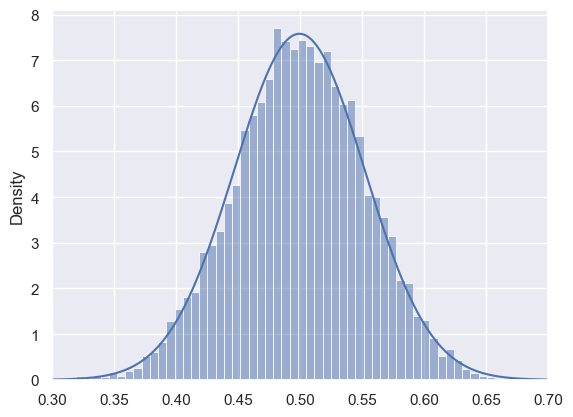

In [16]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from cmath import sqrt

np.random.seed(0)

# 生成10000个从均匀分布中抽样30次的样本均值
x_mean = np.array([])

def generate_x_i(obs):
    x_i = np.random.uniform(0, 1, obs)
    return x_i.mean()

for i in range(10000):
    x_mean = np.append(x_mean,generate_x_i(30))

# 生成正态分布N(0.5，sqrt(1/360))的样本
samples = norm.rvs(loc=0.5, scale=sqrt(1/360), size=10000)
# 计算样本的均值和标准差
sample_mean = np.mean(samples)
sample_std = np.std(samples)
x = np.linspace(0.3, 0.7, 1000)
y = norm.pdf(x, sample_mean, sample_std)

# 绘制概率密度函数
sns.set_theme(color_codes=True)
sns.histplot(x_mean,kde=False,stat='density',alpha=0.5)
plt.xlim(0.3,0.7)
plt.plot(x, y)
plt.show()

## 6.10 大样本OLS和python命令及实例

In [17]:

import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np

nerlove = pd.read_stata('../2_Data/Data-2e/nerlove.dta')
nerlove.head(), nerlove.describe()

(      tc  q   pl         pf   pk      lntc       lnq      lnpf      lnpk  \
 0  0.082  2  2.1  17.900000  183 -2.501036  0.693147  2.884801  5.209486   
 1  0.661  3  2.1  35.099998  174 -0.414001  1.098612  3.558201  5.159055   
 2  0.990  4  2.1  35.099998  171 -0.010050  1.386294  3.558201  5.141664   
 3  0.315  4  1.8  32.200001  166 -1.155183  1.386294  3.471967  5.111988   
 4  0.197  5  2.1  28.600000  233 -1.624552  1.609438  3.353407  5.451038   
 
        lnpl  
 0  0.741937  
 1  0.741937  
 2  0.741937  
 3  0.587787  
 4  0.741937  ,
                tc             q          pl          pf          pk  \
 count  145.000000    145.000000  145.000000  145.000000  145.000000   
 mean    12.976095   2133.082759    1.976552   26.176552  174.496552   
 std     19.794577   2931.942131    0.230040    7.876071   18.209477   
 min      0.082000      2.000000    1.500000   10.300000  138.000000   
 25%      2.382000    279.000000    1.800000   21.299999  162.000000   
 50%      6.7

In [18]:
# 先使用普通标准误差计算回归方程

X = nerlove[['lnq','lnpl','lnpk','lnpf']]
y = nerlove['lntc']
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   lntc   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     437.9
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           4.67e-78
Time:                        23:43:37   Log-Likelihood:                -67.509
No. Observations:                 145   AIC:                             145.0
Df Residuals:                     140   BIC:                             159.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5665      1.779     -2.004      0.0

In [19]:
# 对规模报酬递增进行F检验
# import numpy as np

R = np.zeros_like(results.params)
R[1] = 1
q = 1
r_matrix = (R, q)

F_test = results.f_test(r_matrix)
print(F_test)


<F test: F=256.27151690344976, p=1.95233341405792e-33, df_denom=140, df_num=1>


In [31]:
# 然后使用HC1方法计算回归方程的标准误差。
# 使用get_robustcov_results方法计算稳健标准误
robust_results0 = results.get_robustcov_results(cov_type='HC0')
robust_results1 = results.get_robustcov_results(cov_type='HC1')
robust_results2 = results.get_robustcov_results(cov_type='HC2')
robust_results3 = results.get_robustcov_results(cov_type='HC3')

# HC0使用的是white(1980)的方法
# 经过将这4种不同计算方法的对比，显然HC1方法与教材中的数据一致，因此也可以推测出state中的稳健选项是HC1。

print(robust_results0.summary())

                            OLS Regression Results                            
Dep. Variable:                   lntc   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     183.5
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           1.25e-54
Time:                        23:46:48   Log-Likelihood:                -67.509
No. Observations:                 145   AIC:                             145.0
Df Residuals:                     140   BIC:                             159.9
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5665      1.688     -2.112      0.0

In [32]:
print(robust_results1.summary())

                            OLS Regression Results                            
Dep. Variable:                   lntc   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     177.2
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           9.75e-54
Time:                        23:46:53   Log-Likelihood:                -67.509
No. Observations:                 145   AIC:                             145.0
Df Residuals:                     140   BIC:                             159.9
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5665      1.718     -2.076      0.0

In [33]:
print(robust_results2.summary())

                            OLS Regression Results                            
Dep. Variable:                   lntc   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     173.8
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           2.95e-53
Time:                        23:47:02   Log-Likelihood:                -67.509
No. Observations:                 145   AIC:                             145.0
Df Residuals:                     140   BIC:                             159.9
Df Model:                           4                                         
Covariance Type:                  HC2                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5665      1.741     -2.049      0.0

In [34]:
print(robust_results3.summary())

                            OLS Regression Results                            
Dep. Variable:                   lntc   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     164.6
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           6.84e-52
Time:                        23:47:15   Log-Likelihood:                -67.509
No. Observations:                 145   AIC:                             145.0
Df Residuals:                     140   BIC:                             159.9
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5665      1.795     -1.987      0.0

In [35]:
# 构建原假设
R = np.zeros_like(results.params)
R[1] = 1
q = 1
r_matrix = (R, q)

F_test = robust_results1.f_test(r_matrix)
print(F_test)

<F test: F=73.57120672284364, p=1.6400302842085348e-14, df_denom=140, df_num=1>


## 6.11 大样本理论的蒙特卡罗模拟

DGP：

$y = \alpha + \beta x + \epsilon$

$x \sim \chi^2(1)$

$\epsilon \sim \chi^2(10)-10$

In [95]:
from scipy.stats import chi2
import pandas as pd
import seaborn as sns

# 模拟x序列的数
def chi2_generator(df, size, c):
    x = np.array([])
    x = chi2.rvs(df=df, size=size)
    x = x + c
    return x

def monte_carlo_test(size,times):
    res=[]
    for i in range(times):
        x  = chi2_generator(df=1, size=size, c=0)
        epsilon = chi2_generator(df=10, size=size, c=-10)
        y = 1 + 2*x + epsilon
        X = x
        X = sm.add_constant(X)
        model = sm.OLS(y,X)
        results = model.fit()
        res.append(results.params[1])
    beta = pd.Series(res)    
    return beta

count    10000.000000
mean         2.002999
std          0.972225
min         -5.348784
25%          1.450828
50%          1.952260
75%          2.509906
max          7.523731
dtype: float64


<Axes: ylabel='Count'>

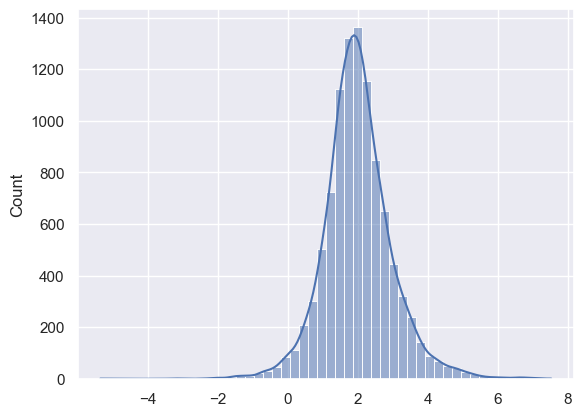

In [96]:
# 样本容量为20时，模拟10000次，计算beta值
beta1 = monte_carlo_test(20, 10000)
print(beta1.describe())
sns.histplot(beta1, bins=50, kde=True)

count    10000.000000
mean         1.999409
std          0.337601
min          0.606248
25%          1.777666
50%          1.987852
75%          2.214863
max          3.530598
dtype: float64


<Axes: ylabel='Count'>

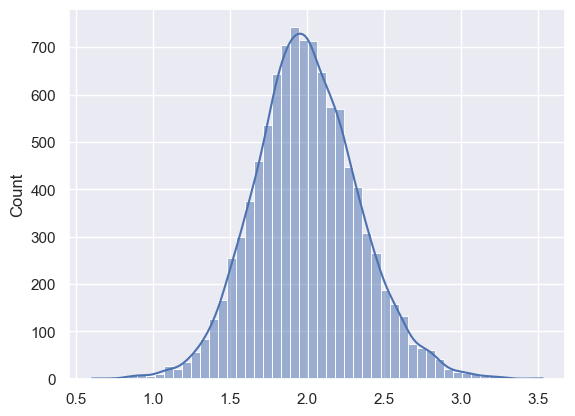

In [97]:
# 样本容量为100，重复试验10000次
beta2 = monte_carlo_test(100, 10000)
print(beta2.describe())
sns.histplot(beta2, bins=50, kde=True)

count    10000.000000
mean         1.998438
std          0.101127
min          1.640504
25%          1.929738
50%          1.997678
75%          2.064561
max          2.387568
dtype: float64


<Axes: ylabel='Count'>

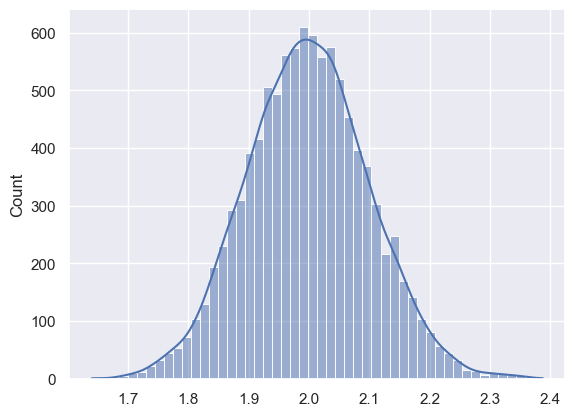

In [103]:
# 样本容量为1000，模拟10000次
beta3 = monte_carlo_test(1000, 10000)
print(beta3.describe())
sns.histplot(beta3, bins=50, kde=True)